Epoch 1/50
50/50 [==============================] - 0s 1ms/step - loss: 64158.7773
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 56.1918
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 7.7340
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 1.3171
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4597
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3460
Epoch 7/50
50/50 [==============================] - ETA: 0s - loss: 0.323 - 0s 2ms/step - loss: 0.3313
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3294
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 11/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3290
Epoch 12/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3290
Epoch 13/50
50/50 [=

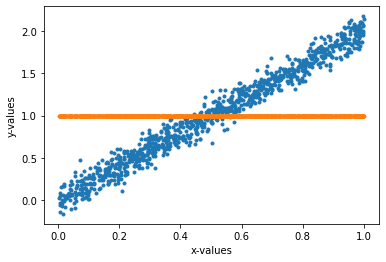

The Simple NN was initilaized with the weights: alpha_init =  0.02  beta_init =  100  b_init =  0  h_init =  0
Boundary conditions:
The Simple NN did not manage to fit the data well.
(i.case1)  b/beta =  1.8548855  =  -1006.0932 / -542.4018  >=? 0
(i.case2)  b/beta =  1.8548855  =  -1006.0932 / -542.4018  <=? -1
(ii)  alpha_prime =  2  =?  -1018532.8  =  1877.8198 * -542.4018  = alpha * beta
(iii)  h =  0.99793774  =?  1889261.8  = - 1877.8198 * -1006.0932  = -alpha * b


In [108]:
#Note: We program a simple NN to interpolate a linear function.


#generating random data from a linear function and adding noise
#generate x-values uniformly inside the interval [0,1]
import numpy as np
X_data = np.random.uniform(0, 1, 1000)

#generate noise with normal distribution
noise = np.random.normal(0, 0.1, X_data.size)

#generate values of the linear function: f(x) = alpha_prime * x
#and add the noise
alpha_prime = 2
y_data = alpha_prime * X_data + noise


#building the model
#import the necessary functions from the tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#introduce the learning model: one hidden layer and one hidden node
model = Sequential()
model.add(Dense(1, input_dim=1, activation='relu', use_bias=True))
model.add(Dense(1, activation='linear', use_bias=True))

#set the weights to custom values
alpha_init = 0.02
beta_init = 100
b_init = 0
h_init = 0
model.set_weights([np.array([[beta_init]]), np.array([b_init]), np.array([[alpha_init]]), np.array([h_init])])

#compile the model
model.compile(loss='mean_squared_error', optimizer='SGD')

#fit the model to our data
model.fit(X_data, y_data, epochs=50, batch_size=20)


#evaluate the model
predictions = model.predict(X_data)

import matplotlib.pyplot as plt

plt.clf()
plt.plot(X_data,y_data,'.')
plt.plot(X_data,predictions,'.')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

#get the weights of the NN
[[[beta]], [b], [[alpha]], [h]] = model.get_weights()

print('The Simple NN was initilaized with the weights: alpha_init = ', alpha_init,' beta_init = ',\
      beta_init,' b_init = ', b_init,' h_init = ',h_init)

print('Boundary conditions:')

if h <= 0.3 and alpha > 0 and beta > 0:
    print('The horizontal part of the ReLU is left of the interval [0,1].')
    print('(i)  b/beta = ', b/beta,' = ', b, '/', beta, ' >=? 0' )
else: 
    if h >= alpha_prime - 0.3 and alpha < 0 and beta < 0:
        print('The horizontal part of the ReLU is right of the interval [0,1].')
        print('(i)  b/beta = ', b/beta,' = ', b, '/', beta, ' <=? -1' )
    else:
        print('The Simple NN did not manage to fit the data well.')
        print('(i.case1)  b/beta = ', b/beta,' = ', b, '/', beta, ' >=? 0' )
        print('(i.case2)  b/beta = ', b/beta,' = ', b, '/', beta, ' <=? -1' )

print('(ii)  alpha_prime = ', alpha_prime, ' =? ', alpha*beta, ' = ', alpha, '*', beta, ' = alpha * beta')
print('(iii)  h = ',h ,' =? ',-alpha * b, ' = -', alpha, '*', b,  ' = -alpha * b' )


In [100]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
